# **Import Data**

#### Import library

In [1]:
import pandas as pd
import numpy as np
from scipy import stats

#### Import database

In [2]:
df_raw_train = pd.read_csv('C:/Users/Rafael/Code/Projetos/Kaggle/titanic/train.csv')
df_raw_test = pd.read_csv('C:/Users/Rafael/Code/Projetos/Kaggle/titanic/test.csv')

df_raw_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Pre-processing dataframe

## *Training Dataframe*

#### Study dataframe

In [3]:
# Describe dataframe

df_raw_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
# General information about dataframe

df_raw_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#### Prepare copy dataframe

In [5]:
# Copy dataframe and get categorical classes

df_train = df_raw_train.copy(deep = True)
drop_column = ['PassengerId','Cabin', 'Ticket', 'Name']
df_train.drop(drop_column, axis=1, inplace = True)


df_train['Sex'] = df_train['Sex'].astype('category')
df_train['Embarked'] = df_train['Embarked'].astype('category')
df_train['Sex'] = df_train['Sex'].cat.codes
df_train['Embarked'] = df_train['Embarked'].cat.codes
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [6]:
# Check for nan values

df_train[['Age']] = df_train[['Age']].fillna(value = df_train.mean())
df_train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

#### Plot correlational heatmap

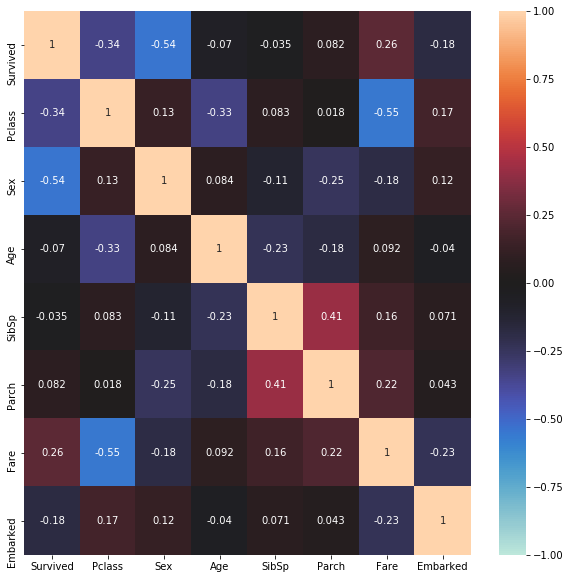

In [7]:
# plot correlational heatmap

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 10))
df_train_correlation = df_train.corr()
sns.heatmap(df_train_correlation, annot = True, vmin = -1, vmax = 1,center = 0)
plt.show()

## *Testing Dataframe*

#### Study dataframe

In [8]:
# Describe dataframe

df_raw_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [9]:
# General information about dataframe

df_raw_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


#### Prepare copy dataframe

In [10]:
# Copy dataframe and get categorical classes

df_test = df_raw_test.copy(deep = True)
drop_column = ['PassengerId','Cabin', 'Ticket', 'Name']
df_test.drop(drop_column, axis=1, inplace = True)


df_test['Sex'] = df_test['Sex'].astype('category')
df_test['Embarked'] = df_test['Embarked'].astype('category')
df_test['Sex'] = df_test['Sex'].cat.codes
df_test['Embarked'] = df_test['Embarked'].cat.codes
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [11]:
# Check for nan values

df_test[['Age']] = df_test[['Age']].fillna(value = df_test.mean())
df_test[['Fare']] = df_test[['Fare']].fillna(value = df_test.mean())
df_test.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

# **Machine Learning**

#### Get and scale values

In [12]:
# Get data from pandas dataframe and scale
from sklearn.preprocessing import MinMaxScaler, StandardScaler

train_input = df_train[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
train_output = df_train['Survived']

test_input = df_test[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]

# Scale
scaler = MinMaxScaler()

scaler.fit(train_input)
train_input = scaler.transform(train_input)

scaler.fit(test_input)
test_input = scaler.transform(test_input)

## *Hold Out Method*

In [13]:
# Make train/test split and Scale values to some patern 
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(train_input, train_output, test_size=0.30, random_state=8)

print(f'Dataset: {df_train.shape}')
print(f'Treino: {x_train.shape}')
print(f'Teste: {x_test.shape}')

Dataset: (891, 8)
Treino: (623, 7)
Teste: (268, 7)


#### Import Models

In [14]:
# Classifiers

from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from xgboost import XGBClassifier

MLA = [
    #Ensemble Methods
    ensemble.AdaBoostClassifier(),
    ensemble.BaggingClassifier(),
    ensemble.ExtraTreesClassifier(),
    ensemble.GradientBoostingClassifier(),
    ensemble.RandomForestClassifier(),

    #Gaussian Processes
    gaussian_process.GaussianProcessClassifier(),
    
    #GLM
    linear_model.LogisticRegressionCV(),
    linear_model.PassiveAggressiveClassifier(),
    linear_model.RidgeClassifierCV(),
    linear_model.SGDClassifier(),
    linear_model.Perceptron(),
    
    #Navies Bayes
    naive_bayes.BernoulliNB(),
    naive_bayes.GaussianNB(),
    
    #Nearest Neighbor
    neighbors.KNeighborsClassifier(),
    
    #SVM
    svm.SVC(probability=True),
    svm.NuSVC(probability=True),
    svm.LinearSVC(),
    
    #Trees    
    tree.DecisionTreeClassifier(),
    tree.ExtraTreeClassifier(),
    
    #Discriminant Analysis
    discriminant_analysis.LinearDiscriminantAnalysis(),
    discriminant_analysis.QuadraticDiscriminantAnalysis(),

    #xgboost:
    XGBClassifier()
    ]

#### Train Models

In [25]:
import datetime
from sklearn.metrics import accuracy_score, classification_report

MLA_columns = ['MLA Name', 'MLA Parameters', 'Accuracy TEST', 'TRAIN', 'Mean Time', 'TEST Report']
MLA_compare = pd.DataFrame(columns = MLA_columns)
MLA_index = 0

for algorithm in MLA:
    
#     Get name and parameters from models and save in dataframe
    MLA_compare.loc[MLA_index, 'MLA Name'] = algorithm.__class__.__name__
    MLA_compare.loc[MLA_index, 'MLA Parameters'] = str(algorithm.get_params())

    
    start_time = datetime.datetime.now()
    
    algorithm.fit(x_train, y_train)
    algorithm_predict = algorithm.predict(x_test)
    train_output = algorithm.predict(train_input)
    
    end_time = datetime.datetime.now() - start_time
    
    
    MLA_compare.loc[MLA_index, 'Accuracy TEST'] = accuracy_score(y_test, algorithm_predict)
    MLA_compare.loc[MLA_index, 'TRAIN'] = train_output
    MLA_compare.loc[MLA_index, 'Mean Time'] = end_time
    MLA_compare.loc[MLA_index, 'TEST Report'] = classification_report(y_test, algorithm_predict)
    MLA_index += 1
    
MLA_compare.sort_values(by = ['Accuracy TEST'], ascending = False, inplace = True)
MLA_compare

,MLA Name,MLA Parameters,Accuracy TEST,TRAIN,Mean Time,TEST Report
21,XGBClassifier,"{'base_score': 0.5, 'booster': 'gbtree', 'cols...",0.839552,"[0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, ...",0:00:00.051938,precision recall f1-score ...
3,GradientBoostingClassifier,"{'ccp_alpha': 0.0, 'criterion': 'friedman_mse'...",0.835821,"[0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, ...",0:00:00.081787,precision recall f1-score ...
0,AdaBoostClassifier,"{'algorithm': 'SAMME.R', 'base_estimator': Non...",0.824627,"[0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, ...",0:00:00.094768,precision recall f1-score ...
4,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",0.820896,"[0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, ...",0:00:00.164527,precision recall f1-score ...
1,BaggingClassifier,"{'base_estimator': None, 'bootstrap': True, 'b...",0.817164,"[0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, ...",0:00:00.020942,precision recall f1-score ...
6,LogisticRegressionCV,"{'Cs': 10, 'class_weight': None, 'cv': None, '...",0.802239,"[0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, ...",0:00:00.173537,precision recall f1-score ...
7,PassiveAggressiveClassifier,"{'C': 1.0, 'average': False, 'class_weight': N...",0.798507,"[0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, ...",0:00:00.000997,precision recall f1-score ...
2,ExtraTreesClassifier,"{'bootstrap': False, 'ccp_alpha': 0.0, 'class_...",0.794776,"[1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, ...",0:00:00.141621,precision recall f1-score ...
5,GaussianProcessClassifier,"{'copy_X_train': True, 'kernel': None, 'max_it...",0.791045,"[0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, ...",0:00:00.288445,precision recall f1-score ...
8,RidgeClassifierCV,"{'alphas': array([ 0.1, 1. , 10. ]), 'class_w...",0.791045,"[0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, ...",0:00:00.001994,precision recall f1-score ...


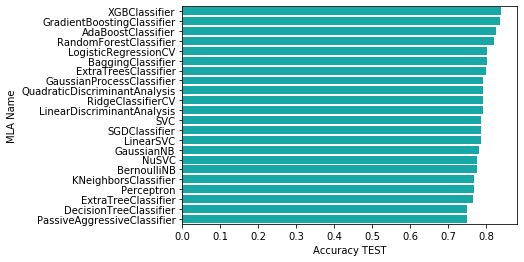

In [16]:
import seaborn as sns

sns.barplot(x ='Accuracy TEST', y = 'MLA Name', data = MLA_compare, color = 'c')

# **Hyper parameter search**

In [20]:
from sklearn.model_selection import GridSearchCV

gbc = ensemble.GradientBoostingClassifier()
rfc = ensemble.RandomForestClassifier()

#GBC
parameters = {'min_samples_split' : range(2, 30, 1)}
gbc_hps = GridSearchCV(gbc, parameters)
gbc_hps.fit(train_input, train_output)
print(gbc_hps.best_params_['min_samples_split'])

20
9


# ***TEST***

In [60]:
test_pred = MLA_compare.loc[21, 'TRAIN']
test_pred = pd.Series(test_pred)

submition_columns = ['PassengerId', 'Survived']
submition = pd.DataFrame(columns = submition_columns)
submition['PassengerId'] = df_raw_test['PassengerId']
submition['Survived'] = test_pred

submition

,PassengerId,Survived
0,892,0
1,893,1
2,894,1
3,895,1
4,896,0
...,...,...
413,1305,0
414,1306,0
415,1307,0
416,1308,1


In [61]:
submition.to_csv('submition.csv', index=False)